## Load data

In [1]:
!pwd

/notebooks


In [2]:
!git clone https://github.com/sunh0003/W251_FinalProject.git

fatal: destination path 'W251_FinalProject' already exists and is not an empty directory.


In [3]:
%mkdir data

mkdir: cannot create directory ‘data’: File exists


In [4]:
%cd W251_FinalProject

/notebooks/W251_FinalProject


In [5]:
%cd Kaggle

/notebooks/W251_FinalProject/Kaggle


In [6]:
%mkdir /notebooks/data/train

mkdir: cannot create directory ‘/notebooks/data/train’: File exists


In [7]:
from shutil import unpack_archive
unpack_archive('train1.zip', '/notebooks')
unpack_archive('train2.zip', '/notebooks')
unpack_archive('train3.zip', '/notebooks')
unpack_archive('validation.zip', '/notebooks')

In [8]:
%mv /notebooks/train1/fear /notebooks/data/train
%mv /notebooks/train1/happy /notebooks/data/train
%mv /notebooks/train2/netural /notebooks/data/train
%mv /notebooks/train2/sad /notebooks/data/train
%mv /notebooks/train2/suprise /notebooks/data/train
%mv /notebooks/train3/angry /notebooks/data/train
%mv /notebooks/train3/disgust /notebooks/data/train
%mv /notebooks/validation /notebooks/data

mv: cannot move '/notebooks/train1/fear' to '/notebooks/data/train/fear': Directory not empty
mv: cannot move '/notebooks/train1/happy' to '/notebooks/data/train/happy': Directory not empty
mv: cannot stat '/notebooks/train2/netural': No such file or directory
mv: cannot move '/notebooks/train2/sad' to '/notebooks/data/train/sad': Directory not empty
mv: cannot stat '/notebooks/train2/suprise': No such file or directory
mv: cannot move '/notebooks/train3/angry' to '/notebooks/data/train/angry': Directory not empty
mv: cannot move '/notebooks/train3/disgust' to '/notebooks/data/train/disgust': Directory not empty
mv: cannot move '/notebooks/validation' to '/notebooks/data/validation': Directory not empty


In [1]:
!pwd

/notebooks


## Model

In [10]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.5/dist-packages (20.1.1)


In [11]:
!pip3 install pillow

In [69]:
! rmdir /notebooks/data/validation/.ipynb_checkpoints

rmdir: failed to remove '/notebooks/data/validation/.ipynb_checkpoints': No such file or directory


# VGG transfer learning - NOT working

In [43]:
import  PIL
from PIL import Image

In [48]:
im=image.load_img(train_paths[0])
im.size

(48, 48)

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.regularizers import l1

Using TensorFlow backend.


In [4]:
#https://github.com/Tahsin-Mayeesha/udacity-mlnd-deeplearning-capstone/blob/master/Notebooks/Feature%20extraction.ipynb
import h5py
import os
import numpy as np
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [13]:

train_dir = "/notebooks/data7cls_randomsplit/train/"
valid_dir = "/notebooks/data7cls_randomsplit/validation/"
classes = os.listdir(train_dir)
classes

['distracted', 'sad', 'confused', 'angry', 'surprise', 'happy', 'neutral']

In [10]:
train_paths = []
for c in classes:
    train_images = [train_dir+c+'/'+item for item in os.listdir(train_dir+c+'/')]
    train_paths.extend(train_images)

In [11]:
len(train_paths)

25447

In [25]:
train_paths1=[]
for i in train_paths:
    if i.endswith(".jpg") or i.endswith(".png"):
        train_paths1.append(i)
len(train_paths1)

25446

In [14]:
valid_paths = []
for c in classes:
    valid_images = [valid_dir+c+'/'+item for item in os.listdir(valid_dir+c+'/')]
    valid_paths.extend(valid_images)
len(valid_paths)

6238

In [28]:
valid_paths1=[]
for i in valid_paths:
    if i.endswith(".jpg") or i.endswith(".png"):
        valid_paths1.append(i)
len(valid_paths1)

6236

In [29]:
def preprocess_image(path):
    img = image.load_img(path, target_size = (height, width))
    a = image.img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    return preprocess_input(a)
height,width=48,48
%time
preprocessed_images = np.vstack([preprocess_image(fn) for fn in train_paths1])
%time
np.save("train_preprocesed.npy",preprocessed_images)

%time
valid_preprocessed_images = np.vstack(preprocess_image(fn) for fn in valid_paths1)
%time
np.save("valid_preprocessed.npy",valid_preprocessed_images)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 11.4 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11.9 µs
CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 12.2 µs


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  del sys.path[0]


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 12.4 µs


In [5]:
model = VGG16(weights="imagenet",include_top=False)

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [49]:
train_images

['/notebooks/data7cls_randomsplit/train/neutral/30012.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/17749.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/27314.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/2000.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/23785.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/26466.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/10630.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/35674.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/4896.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/6545.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/10294.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/6953.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/9684.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/15609.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/18879.jpg',
 '/notebooks/data7cls_randomsplit/train/neutral/19787.jpg',
 '/notebooks/data7cls_randomsplit/train/neutr

In [30]:
train_features = model.predict(train_images,batch_size = 1,verbose = 1)

AttributeError: 'str' object has no attribute 'ndim'

# try another one
https://www.kaggle.com/suniliitb96/tutorial-keras-transfer-learning-with-resnet50?select=resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

In [58]:
!pip3 install opencv-python

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import os

In [54]:
# Fixed classes
NUM_CLASSES = 7
CHANNELS = 3

IMAGE_RESIZE = 48
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1

In [55]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [60]:
import sys
sys.path.append('/root/.local/lib/python3.5/site-packages')

In [74]:
#get the weight form github repo
!git clone https://github.com/sunh0003/W251_FinalProject

Cloning into 'W251_FinalProject'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), done.
Checking connectivity... done.


In [64]:
resnet_weights_path = '/notebooks/W251_FinalProject/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [65]:
#Still not talking about our train/test data or any pre-processing.
model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = resnet_weights_path))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 7)                 14343     
Total params: 23,602,055
Trainable params: 14,343
Non-trainable params: 23,587,712
_________________________________________________________________


In [67]:
from tensorflow.python.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [69]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
image_size = IMAGE_RESIZE

train_dir = "/notebooks/data7cls_randomsplit/train/"
valid_dir = "/notebooks/data7cls_randomsplit/validation/"

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        valid_dir,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

Found 25446 images belonging to 7 classes.
Found 6236 images belonging to 7 classes.


In [70]:
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

(100, 255, 100, 63)

In [71]:
%mkdir transferlearn

In [75]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = '/notebooks/W251_FinalProject/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [76]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)
model.load_weights('/notebooks/W251_FinalProject/best.hdf5')

Epoch 1/10
255/255 [==============================] - 226s 885ms/step - loss: 1.6854 - acc: 0.4304 - val_loss: 1.9967 - val_acc: 0.3921
Epoch 2/10
255/255 [==============================] - 225s 882ms/step - loss: 1.6713 - acc: 0.4375 - val_loss: 1.8770 - val_acc: 0.4193
Epoch 3/10
255/255 [==============================] - 220s 865ms/step - loss: 1.6557 - acc: 0.4405 - val_loss: 1.8815 - val_acc: 0.4275
Epoch 4/10
255/255 [==============================] - 222s 872ms/step - loss: 1.6572 - acc: 0.4477 - val_loss: 1.8569 - val_acc: 0.4312
Epoch 5/10
255/255 [==============================] - 223s 873ms/step - loss: 1.6610 - acc: 0.4460 - val_loss: 1.8623 - val_acc: 0.4250
Epoch 6/10
255/255 [==============================] - 223s 876ms/step - loss: 1.6450 - acc: 0.4512 - val_loss: 1.9325 - val_acc: 0.4157
Epoch 7/10
255/255 [==============================] - 219s 860ms/step - loss: 1.6386 - acc: 0.4565 - val_loss: 1.9062 - val_acc: 0.3970


In [77]:
print(fit_history.history.keys())

dict_keys(['acc', 'val_acc', 'loss', 'val_loss'])


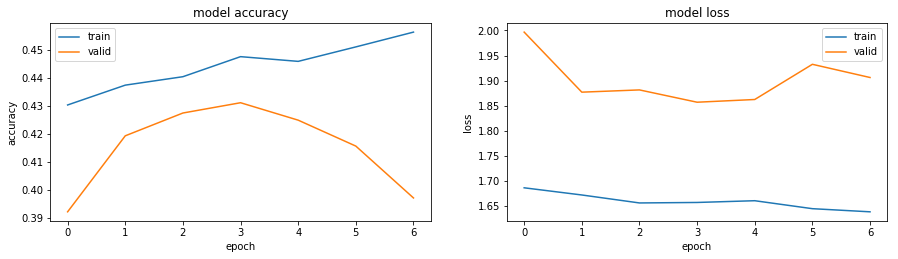

In [78]:
 plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['acc'])  
plt.plot(fit_history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [79]:
test_generator = data_generator.flow_from_directory(
    directory = '/notebooks/data7cls/validation',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

Found 6229 images belonging to 7 classes.


In [81]:
# test_generator.reset()

# pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

# predicted_class_indices = np.argmax(pred, axis = 1)

# confusion matrix

Found 6229 images belonging to 7 classes.
Confusion Matrix
[[ 241    0    2  253  109  292   63]
 [   0  161    1    0    0    0    0]
 [   1    0  124    0    4    1    0]
 [ 172    4    5 1032  190  356   66]
 [ 161    4    4  337  334  307   69]
 [ 137    3    0  285  159  512   43]
 [  81    2    0  155   89  127  343]]
Classification Report
              precision    recall  f1-score   support

       angry       0.30      0.25      0.27       960
    confused       0.93      0.99      0.96       162
  distracted       0.91      0.95      0.93       130
       happy       0.50      0.57      0.53      1825
     neutral       0.38      0.27      0.32      1216
         sad       0.32      0.45      0.37      1139
    surprise       0.59      0.43      0.50       797

    accuracy                           0.44      6229
   macro avg       0.56      0.56      0.56      6229
weighted avg       0.44      0.44      0.44      6229



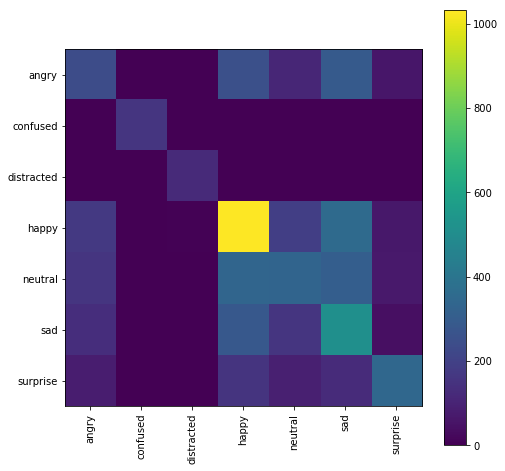

In [91]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 25446
nb_validation_samples = 6229

# We need to recreate our validation generator with shuffle = false
validation_generator = data_generator.flow_from_directory(
        directory = '/notebooks/data7cls/validation',
        #color_mode = 'grayscale',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TESTING,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
# def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
#     cm = cm.astype('float') / cm.sum(axis=1)#[:, np.newaxis]
#     plt.figure(figsize=(10,10))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

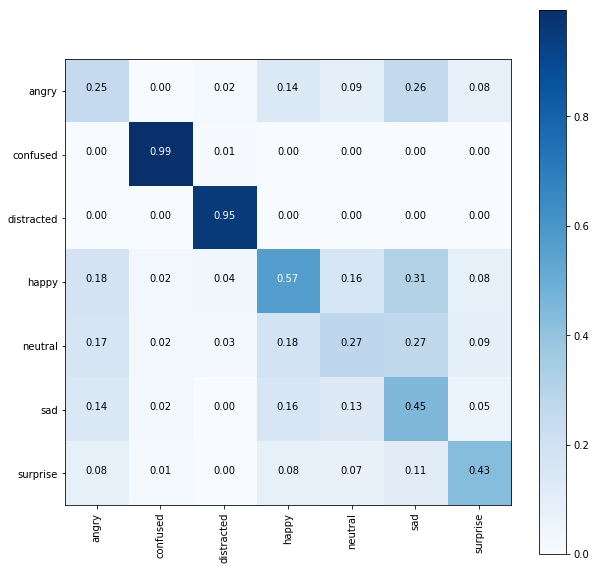

In [92]:
import itertools
cm=cnf_matrix
cm = cm.astype('float') / cm.sum(axis=1)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

In [93]:
%mkdir data7cls_newimg_randomsplit

In [ ]:
# option 2: setup transfer learning code, using 9 classes wts for 7 classes - Michelle